<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Открытие-данных" data-toc-modified-id="Открытие-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Открытие данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Количество-событий-в-логе" data-toc-modified-id="Количество-событий-в-логе-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Количество событий в логе</a></span></li><li><span><a href="#Количество-пользователей-в-логе" data-toc-modified-id="Количество-пользователей-в-логе-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Количество пользователей в логе</a></span></li><li><span><a href="#Среднее-количество-событий-на-пользователя" data-toc-modified-id="Среднее-количество-событий-на-пользователя-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Среднее количество событий на пользователя</a></span></li><li><span><a href="#Временной-отрезок-данных" data-toc-modified-id="Временной-отрезок-данных-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Временной отрезок данных</a></span></li><li><span><a href="#Проверьте,-что-у-вас-есть-пользователи-из-всех-трёх-экспериментальных-групп." data-toc-modified-id="Проверьте,-что-у-вас-есть-пользователи-из-всех-трёх-экспериментальных-групп.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.</a></span></li></ul></li><li><span><a href="#Воронка-событий" data-toc-modified-id="Воронка-событий-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Воронка событий</a></span></li><li><span><a href="#Изучение-результатов-эксперимента" data-toc-modified-id="Изучение-результатов-эксперимента-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Изучение результатов эксперимента</a></span><ul class="toc-item"><li><span><a href="#Статистическая-разница-между-выборками-246-и-247" data-toc-modified-id="Статистическая-разница-между-выборками-246-и-247-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Статистическая разница между выборками 246 и 247</a></span></li><li><span><a href="#Статистическая-разница-между-выборками-246-и-248" data-toc-modified-id="Статистическая-разница-между-выборками-246-и-248-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Статистическая разница между выборками 246 и 248</a></span></li><li><span><a href="#Статистическая-разница-между-выборками-247-и-248" data-toc-modified-id="Статистическая-разница-между-выборками-247-и-248-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Статистическая разница между выборками 247 и 248</a></span></li><li><span><a href="#Статистическая-разница-между-объединенной-контрольной-группой-и-248" data-toc-modified-id="Статистическая-разница-между-объединенной-контрольной-группой-и-248-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Статистическая разница между объединенной контрольной группой и 248</a></span></li><li><span><a href="#Выбор-уровня-значимости" data-toc-modified-id="Выбор-уровня-значимости-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Выбор уровня значимости</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

# Сборный проект

## Описание проекта

Мобильное приложение компании, которая продает продукты питания. Нужно определить, как себя ведут пользователи: изучение воронки продаж, поиск шагов, на которых останавливаются пользователи. Исследование результатов А/А/В-эксперимента. 

## Открытие данных

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth

In [20]:
try:
    data = pd.read_csv('/datasets/logs_exp.csv', sep = '\t')
except:
    data = pd.read_csv('/Users/air/Downloads/logs_exp.csv', sep = '\t')

In [21]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


## Предобработка данных

In [22]:
# Изменим названия столбцов

data.columns = ['event', 'id', 'dt', 'exp_id']

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   event   244126 non-null  object
 1   id      244126 non-null  int64 
 2   dt      244126 non-null  int64 
 3   exp_id  244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Как мы видим, пропусков в данных нет. Проверим на наличие дубликатов:

In [24]:
data.duplicated().sum()

413

У нас 413 дубликатов. Это небольшой процент от общего количества данных, поэтому просто удалим их.

In [25]:
data = data.drop_duplicates()

Изменим тип данных в столбце 'time':

In [26]:
data['dt'] = pd.to_datetime(data['dt'], unit='s')

Добавим отдельный столбец с датой:

In [27]:
data['date'] = data['dt'].dt.date

In [28]:
data.head()

,event,id,dt,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


**Вывод:** В ходе предобработки были изменены названия столбцов, удалены дубликаты, данные преобразованы к нужному типу.

## Изучение данных

### Количество событий в логе

In [29]:
data.event.nunique()

5

В данном логе 5 уникальных событий.

### Количество пользователей в логе

In [30]:
data.id.nunique()

7551

В логе 7551 уникальных пользователей

### Среднее количество событий на пользователя

In [31]:
data.shape[0]/ data.id.nunique()

32.27559263673685

В среднем на одного пользователя приходится 32 события, посмотрим на распределение:

(0.0, 100.0)

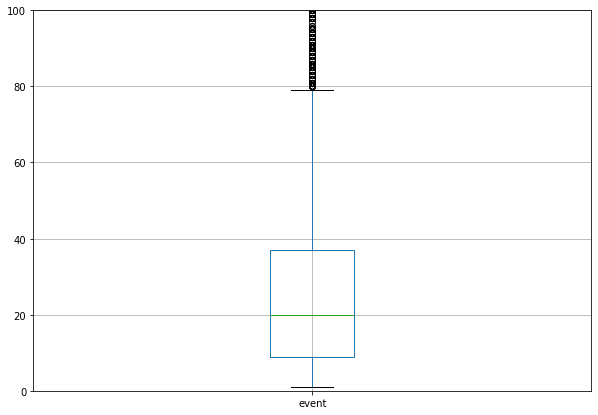

In [32]:
plt.figure(figsize=(10,7))
data.groupby('id').agg({'event' : 'count'}).sort_values(by='event', ascending = False).boxplot()
plt.ylim(0, 100)

Распределение сильно отличается от нормального, поэтому среднее значение может быть искажено. Медианное количество событий на пользователя - 20.

### Временной отрезок данных

Узнаем, за какой отрезок времени мы располагаем данными:

In [33]:
print('Минимальная дата:', data['date'].min())
print('Максимальная дата:', data['date'].max()) 

Минимальная дата: 2019-07-25
Максимальная дата: 2019-08-07


Проверим, одинаково ли полные данные представлены за весь период:

Text(0, 0.5, 'Количество действий')

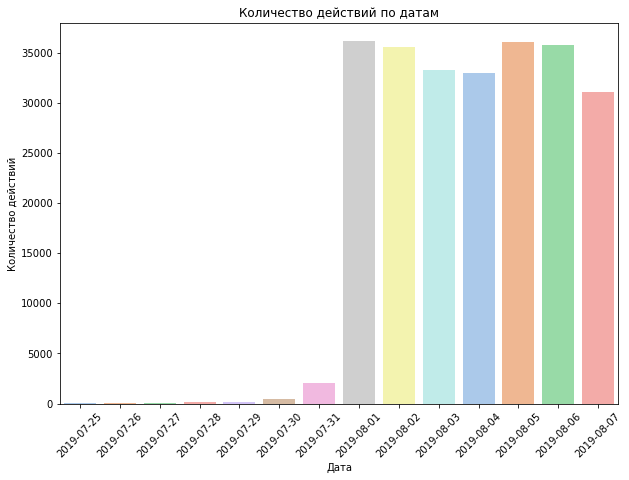

In [34]:
plt.figure(figsize = (10,7))

sns.barplot(
    data = data.groupby('date').agg({'id' : 'count'}).reset_index(),
    x = 'date',
    y = 'id',
    palette = 'pastel'
)

plt.xticks(rotation=45)
plt.title('Количество действий по датам')
plt.xlabel('Дата')
plt.ylabel('Количество действий')

На графике видно, что 31 июля наблюдается разкий скачок. Скорее всего это остаточные данные из прошлых событий по некоторым пользователям. Посмотрим, сколько их:

In [35]:
data.query('dt <= "2019-07-31"').event.count()

796

Рассмотрим сколько это в процентном соотношении:

In [38]:
report = data.query('dt <= "2019-07-31"')

In [39]:
# Процент отфильтрованных событий 
len(report['event']) / len(data['event'])

0.00326613680845913

In [40]:
# Процент отфильтрованных пользователей
report.id.nunique() / data.id.nunique()

0.07350019864918554

Таким образом, мы отфильтровали 0.3% всех событий и 7.3% уникальных пользователей.

In [41]:
data = data.query('dt > "2019-07-31"')

### Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

Сначала проверим, все ли пользователи входят только в одну группу:

In [42]:
data.groupby('id').agg({'exp_id' : 'nunique'}).reset_index().exp_id.unique()

array([1])

Да, каждый пользователь является участником только одной из наблюдаемых групп теста.

In [43]:
data.groupby('exp_id').agg({'id':'nunique'})

,id
exp_id,
246,2485
247,2517
248,2540


**Вывод:** Таким образом, в группах примерно одинаковое количество участников, каждый участник находится только в одной группе.

## Воронка событий

In [45]:
# Функиця для построения воронки событий(на вход принимает датасет и количество уникальных пользователей)
def make_funnel(data, unique_count):
    
    
    # Создадим вороонку
    report = (
    data.groupby('event').agg({'id' : 'nunique'})
    .sort_values(by = 'id', ascending = False)
    .reset_index()
    )

    # Добавим столбец со значением конверии
    report['conversion'] = report['id'] / unique_count

    # Добавим столбцы, показывающие, сколько пользователей было на предыдущем шаге
    report['previous_step'] = report['id'].shift()

    # И конверсию в следующий шаг
    report['step_conversion'] = report['id'] / report['previous_step']
    
    return report

In [46]:
unique_count_all = data.id.nunique()
report = make_funnel(data, unique_count_all)
report

,event,id,conversion,previous_step,step_conversion
0,MainScreenAppear,7429,0.985017,NaN,NaN
1,OffersScreenAppear,4606,0.610713,7429.0,0.620003
2,CartScreenAppear,3742,0.496155,4606.0,0.812419
3,PaymentScreenSuccessful,3542,0.469637,3742.0,0.946553
4,Tutorial,845,0.112039,3542.0,0.238566


Как мне кажется, событие 'Tutorial'(скорее всего это страница, объясняющся, как пользоваться сайтом) не входит в воронку событий, так как является необязательной и на нее переходит только 11% пользователей. Отфильтруем эти события:

In [47]:
data = data.query('event != "Tutorial"')
report = report.query('event != "Tutorial"')

Text(0, 0.5, 'Название события')

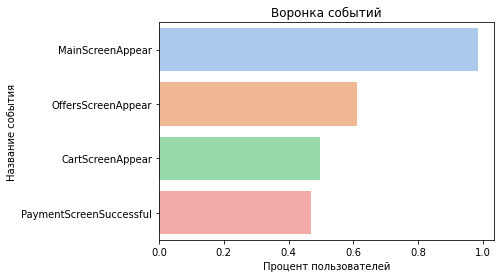

In [48]:
sns.barplot(
    data = report,
    x = 'conversion',
    y = 'event',
    palette = 'pastel'
)

plt.title('Воронка событий')
plt.xlabel('Процент пользователей')
plt.ylabel('Название события')

**Вывод:**
 - Как мне кажется, событие 'Tutorial'(скорее всего это страница, объясняющся, как пользоваться сайтом)  не входит в воронку событий, так как является необязательной и на нее переходит только 10% пользователей.
 - До шага создания заказа('Offer Screen Appear') доходят только 60% пользоватей. Именно на этом шаге мы теряем наибольшее количество пользователей.
 - До корзины доходят 50% пользователей(81% от предыдщего шага)
 - До успешной оплаты товара доходят 47% пользователей(94% от предыдущего шага)
 
 Таким образом, больше всего пользователей уходят на заказе товара. До успешной оплаты доходят только 47% процентов пользвователей.

## Изучение результатов эксперимента

### Статистическая разница между выборками 246 и 247

In [49]:
# Посмотроим воронку для группы 246

count_246 = data[data['exp_id'] == 246].id.nunique()
report_246 = make_funnel(data[data['exp_id'] == 246], count_246)
report_246

,event,id,conversion,previous_step,step_conversion
0,MainScreenAppear,2452,0.987118,NaN,NaN
1,OffersScreenAppear,1544,0.621578,2452.0,0.629690
2,CartScreenAppear,1267,0.510064,1544.0,0.820596
3,PaymentScreenSuccessful,1200,0.483092,1267.0,0.947119


In [50]:
# Посмотроим воронку для группы 246

count_247 = data[data['exp_id'] == 247].id.nunique()
report_247 = make_funnel(data[data['exp_id'] == 247], count_247)
report_247

,event,id,conversion,previous_step,step_conversion
0,MainScreenAppear,2479,0.985294,NaN,NaN
1,OffersScreenAppear,1526,0.606518,2479.0,0.615571
2,CartScreenAppear,1239,0.492448,1526.0,0.811927
3,PaymentScreenSuccessful,1159,0.460652,1239.0,0.935432


In [51]:
# Соединим две таблицы и оставим только значения пользователей в каждом из событий
report = report_246.merge(report_247, left_on='event', right_on='event',
          suffixes=('_246', '_247'))
report = report.drop(columns = ['conversion_246', 'previous_step_246', 'step_conversion_246', 'conversion_247', 'previous_step_247', 'step_conversion_247'])

# Удалим строку 'Tutorial', так как это событие не участвует в воронке
#report = report.query('event != "Tutorial"')
report


,event,id_246,id_247
0,MainScreenAppear,2452,2479
1,OffersScreenAppear,1544,1526
2,CartScreenAppear,1267,1239
3,PaymentScreenSuccessful,1200,1159


Проверим, находят ли статистические критерии разницу между выборками 246 и 247. Для этого я буду использовать z-тест для проверки гипотезы о равенстве долей. Для начала найдем общее количество уникальных участников для двух групп:

Проверим гипотезы о равенстве долей. Для этого возьмем общее количество уникальных пользователей в каждой группе('trials') и количество пользователей, дошедших до определенного события.('successes')

In [54]:
# Функция для проверки равенства долей

def check_proportion(successes, successes2, trials1, trials2):
    
    alpha = 0.05 # критический уровень статистической значимости
    
    # пропорция успехов в первой группе:
    p1 = successes1/trials1
    
    # пропорция успехов во второй группе:
    p2 = successes2/trials2
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    
    # разница пропорций в датасетах
    difference = p1 - p2 
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials1 + 1 / trials2)
    )
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        ) 

In [55]:
id_246 = np.array(report['id_246'])
id_247 = np.array(report['id_247'])

In [56]:
for i in range(len(id_246)):
    successes1 = id_247[i]
    successes2 = id_246[i]
    
    check_proportion(successes1, successes2, count_247, count_246)

p-значение:  0.5805343777533254
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.2740978967145842
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.21290277963348125
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.11200578978978504
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:** По результатам z-теста у нас нет оснований считать доли в группах разными, то есть контрольные группы А/А проходят проверку.

### Статистическая разница между выборками 246 и 248

In [57]:

# Создадим воронку событий для группы 248
count_248 = data[data['exp_id'] == 248].id.nunique()
report_248 = make_funnel(data[data['exp_id'] == 248], count_248)
report_248 = report_248.drop(columns = ['conversion', 'previous_step', 'step_conversion'])

# Прикрепим эти данные к таблицам со значениями в других группах
report = report.merge(report_248, how = 'left', on = 'event')
report = report.rename(columns = {'id' : 'id_248'})

In [58]:
report

,event,id_246,id_247,id_248
0,MainScreenAppear,2452,2479,2498
1,OffersScreenAppear,1544,1526,1536
2,CartScreenAppear,1267,1239,1236
3,PaymentScreenSuccessful,1200,1159,1183


In [60]:
id_248 = np.array(report['id_248'])

In [61]:
# Проведем тест для сравнения групп 248 и 246 по каждому из событий:
for i in range(len(id_246)):
    successes1 = id_248[i]
    successes2 = id_246[i]

    check_proportion(successes1, successes2, count_248, count_246)

p-значение:  0.3910084761063306
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.23345264246794972
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.10214014435215457
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.22836891483970034
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:** Статистической разницы между группам 248 и 246 нет.

### Статистическая разница между выборками 247 и 248

In [62]:
for i in range(len(id_247)):
    successes1 = id_248[i]
    successes2 = id_247[i]

    check_proportion(successes1, successes2, count_248, count_247)

p-значение:  0.7595837257920652
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.9236613722909124
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.6983295296960459
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.6969580996470051
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:** Статистической разницы между группам 248 и 247 тоже нет.

### Статистическая разница между объединенной контрольной группой и 248

In [63]:
report

,event,id_246,id_247,id_248
0,MainScreenAppear,2452,2479,2498
1,OffersScreenAppear,1544,1526,1536
2,CartScreenAppear,1267,1239,1236
3,PaymentScreenSuccessful,1200,1159,1183


In [64]:
for i in range(len(id_247)):
    successes1 = id_248[i]   # Пользователи в событии в группе 248
    successes2 = id_247[i] + id_246[i]   # Объединенные пользователи

    check_proportion(successes1, successes2, count_248, (count_247+count_246))

p-значение:  0.5004352349609864
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.4589699094694544
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.24382507685747923
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.6402447407253697
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:** Статистической разницы между группой 248 и объединенной группой тоже нет. 

### Выбор уровня значимости

Мы проводили несколько сравнений на одних и тех же данных, то есть множественный тест. Таким образом, с каждой новой проверкой гипотез растет вероятность ошибки 1-го рода.

При проверке я выбирала уровень статистической значимости 0.05. У нас 4 воронки из 4-х собтиый, то есть я провела 16 проверок. 

Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, я буду применять метод Бонферрони: 

In [65]:
alpha_new = 0.05 / 16
alpha_new

0.003125

Так как у нас уже выведены значения p_value в предыдущих шагах, мы можем не проводить тесты еще раз, а просто сравнить значения с новым значением alpha. 

Во всех результатах теста у нас p_value был больше alpha, из-за чего мы не отвергали нулевую гипотезу. Сейчас alpha уменьшилась, за счет чего p_value все еще остался больше нового значения alpha.

Таким образом, можно сделать вывод, что у нас нет оснований считать доли разными.

## Вывод:

 - В ходе предобработки были изменены названия столбцов, удалены дубликаты, данные преобразованы к нужному типу.
 - Было проведено исследование временного отрезка, за который представлены данные, в ходе которого были исключены данные, не входящие в этот временно отрезок.
 - Была построена воронка событий как для всех пользователей, так и с разделением по пользователям из разных групп.
 - Были проведены статистические тесты для выявления разницы в предсталенных выборках. В ходе тестов выяснилось, что у нас нет оснований считать доли разными. 
 - Таким образом, данное тестирование можно считать корректным.